In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
@pd.api.extensions.register_dataframe_accessor("geo")
class GeoAccessor:
    def __init__(self, pandas_obj):
        self._validate(pandas_obj)
        self._obj = pandas_obj

    @staticmethod
    def _validate(obj):
        # verify there is a column latitude and a column longitude
        if "latitude" not in obj.columns or "longitude" not in obj.columns:
            raise AttributeError("Must have 'latitude' and 'longitude'.")

    @property
    def center(self):
        # return the geographic center point of this DataFrame
        lat = self._obj.latitude
        lon = self._obj.longitude
        return (float(lon.mean()), float(lat.mean()))

    def plot(self):
        plt.figure(figsize=(7,7))       
        lat = self._obj.latitude
        lon = self._obj.longitude
        x_max = max(lon)
        y_max = max(lat)
        plt.xlim(0, x_max+1)
        plt.ylim(0, y_max+1)
        plt.scatter(lon, lat)
        plt.scatter([float(lon.mean())], [float(lat.mean())], marker='^', color='red')
        plt.show()

C:\Users\Lorry\AppData\Local\Temp/ipykernel_41480/3626568302.py:5: UserWarning: registration of accessor <class '__main__.GeoAccessor'> under name 'geo' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class GeoAccessor:


In [7]:
ds = pd.DataFrame(
    {"longitude": np.linspace(0, 10, 10), "latitude": np.linspace(0, 20, 10)}
)
ds.geo.center

(5.0, 10.0)

In [8]:
ds

,longitude,latitude
0,0.000000,0.000000
1,1.111111,2.222222
2,2.222222,4.444444
3,3.333333,6.666667
4,4.444444,8.888889
5,5.555556,11.111111
6,6.666667,13.333333
7,7.777778,15.555556
8,8.888889,17.777778
9,10.000000,20.000000


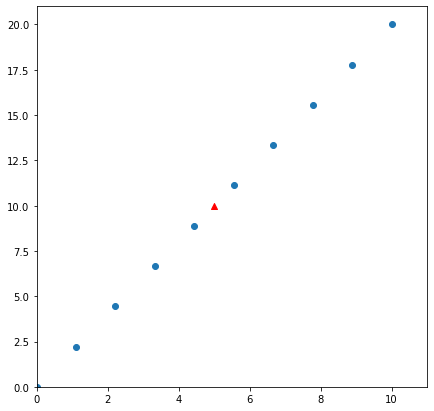

In [9]:
ds.geo.plot()                        

In [17]:
@pd.api.extensions.register_dataframe_accessor("rectangle")
class RectangleAccessor:
    def __init__(self, pandas_obj):
        self._validate(pandas_obj)
        self._obj = pandas_obj

    @staticmethod
    def _validate(obj):
        # verify there is a column 'length' and a column 'width'
        if "length" not in obj.columns or "width" not in obj.columns:
            raise AttributeError("Must have 'length' and 'width'.")

    @property
    def area(self):
        length = self._obj.length
        width = self._obj.width
        return length*width
    
    @property
    def perimeter(self):
        length = self._obj.length
        width = self._obj.width
        return (length*2+width*2)
    
    def plot(self):
        # plot this array's data on a map, e.g., using Cartopy
        pass

C:\Users\Lorry\AppData\Local\Temp/ipykernel_40748/730696912.py:2: UserWarning: registration of accessor <class '__main__.RectangleAccessor'> under name 'rectangle' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class RectangleAccessor:


In [18]:
df = pd.DataFrame(
    {"length": np.linspace(0, 10, 10, endpoint=False), "width": np.linspace(0, 20, 10, endpoint=False)}
)
df

,length,width
0,0.0,0.0
1,1.0,2.0
2,2.0,4.0
3,3.0,6.0
4,4.0,8.0
5,5.0,10.0
6,6.0,12.0
7,7.0,14.0
8,8.0,16.0
9,9.0,18.0


In [19]:
df.rectangle.area

0      0.0
1      2.0
2      8.0
3     18.0
4     32.0
5     50.0
6     72.0
7     98.0
8    128.0
9    162.0
dtype: float64

In [20]:
df.rectangle.perimeter

0     0.0
1     6.0
2    12.0
3    18.0
4    24.0
5    30.0
6    36.0
7    42.0
8    48.0
9    54.0
dtype: float64

In [21]:
df.iloc[1:2].rectangle.perimeter

1    6.0
dtype: float64

In [51]:
@pd.api.extensions.register_dataframe_accessor("Point")
class PointAccessor:
    def __init__(self, pandas_obj):
        self._validate(pandas_obj)
        self._obj=pandas_obj
    
    @staticmethod
    def _validate(obj):
        if (len(obj.columns)!=3):
            raise AttributeError("Must have 3 columns.")
            return
        if 'x' not in obj.columns or 'y' not in obj.columns or 'z' not in obj.columns:
            raise AttributeError("Must have x, y, and z.")
            return
    
    @property
    def distance(self):
        x = self._obj.x
        y = self._obj.y
        z = self._obj.z
        return (x**2+y**2+z**2)
    
    def dotProduct(self, a, b):
        x1 = self._obj.iloc[a]['x']
        y1 = self._obj.iloc[a]['y']
        z1 = self._obj.iloc[a]['z']
        x2 = self._obj.iloc[b]['x']
        y2 = self._obj.iloc[b]['y']
        z2 = self._obj.iloc[b]['z']
        return (x1*x2+y1*y2+z1*z2)
    
    def crossProduct(self, a, b):
        x1 = self._obj.iloc[a]['x']
        y1 = self._obj.iloc[a]['y']
        z1 = self._obj.iloc[a]['z']
        x2 = self._obj.iloc[b]['x']
        y2 = self._obj.iloc[b]['y']
        z2 = self._obj.iloc[b]['z']
        return ((y1*z2-z1*y2), (z1*x2-x1*z2), (x1*y2-y1*x2))

C:\Users\Lorry\AppData\Local\Temp/ipykernel_40748/3520204219.py:2: UserWarning: registration of accessor <class '__main__.PointAccessor'> under name 'Point' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class PointAccessor:


In [52]:
df2 = pd.DataFrame(
    {"x": np.linspace(0, 5, 5, endpoint=False), 
     "y": np.linspace(0, 10, 5, endpoint=False),
     "z": np.linspace(0, 5, 5, endpoint=False)}
)
df2

,x,y,z
0,0.0,0.0,0.0
1,1.0,2.0,1.0
2,2.0,4.0,2.0
3,3.0,6.0,3.0
4,4.0,8.0,4.0


In [53]:
df2.Point.distance

0     0.0
1     6.0
2    24.0
3    54.0
4    96.0
dtype: float64

In [56]:
df2.Point.dotProduct(1,2)

12.0

In [58]:
df2.Point.crossProduct(1,3)

(0.0, 0.0, 0.0)